Name: Tushar Muley

Assignment: Assignment 6-1

Date:January 9, 2022

#### Assignment 6.1

Using section 5.1 in Deep Learning with Python as a guide (listing 5.3 in particular), create a ConvNet model that classifies images in the MNIST digit dataset. 

In [1]:
from keras import layers
from keras import models


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Listing 5.2. Adding a classifier on top of the convnet

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

#### Listing 5.3. Training the convnet on MNIST images

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical


In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255


In [9]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


In [10]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [16]:
# validation set
val_images = train_images[:10000,:]
val_labels = train_labels[:10000,:]

partial_train_images = train_images[10000:,:]
partial_train_labels = train_labels[10000:,:]

partial_train_images.shape, val_images.shape

((50000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
# train the model
history=model.fit(train_images,
                  train_labels, 
                  epochs=5, 
                  batch_size=64,
                  validation_data=(val_images, val_labels))

Epoch 1/5
938/938 [==============================] - 35s 36ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.0124 - val_accuracy: 0.9962
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0080 - val_accuracy: 0.9974
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0045 - val_accuracy: 0.9987
Epoch 4/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0045 - val_accuracy: 0.9985
Epoch 5/5
938/938 [==============================] - 40s 43ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.0068 - val_accuracy: 0.9976


In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plot

##### Training and Validation Loss

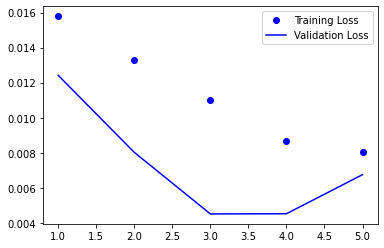

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_val = history_dict["loss"]
val_loss_val = history_dict["val_loss"]
epochs= range(1, len(loss_val) +1)
plt.plot(epochs, loss_val, "bo", label="Training Loss")
plt.plot(epochs, val_loss_val, "b", label="Validation Loss")
plt.plot(title = "Training and Validation Loss")
plt.plot(xlabel="Epochs")
plt.plot(ylabel="Loss")
plt.legend()
plt.show()
         

##### Training and Validation Accuracy

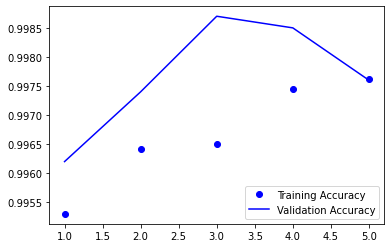

In [22]:
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs= range(1, len(loss_val) +1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.plot(title = "Training and Validation Accuracy")
plt.plot(xlabel="Epochs")
plt.plot(ylabel="Accuracy")
plt.legend()
plt.show()

#### Retrain model

In [26]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=3, batch_size=512)

results=model.evaluate(test_images, test_labels)

Epoch 1/3
118/118 [==============================] - 30s 248ms/step - loss: 0.0018 - accuracy: 0.9993
Epoch 2/3
118/118 [==============================] - 34s 283ms/step - loss: 6.9039e-04 - accuracy: 0.9997
Epoch 3/3
313/313 [==============================] - 3s 8ms/step - loss: 0.0373 - accuracy: 0.9927


In [27]:
results

[0.03726635128259659, 0.9926999807357788]

In [28]:
model.predict(test_images)

array([[1.17138473e-18, 1.52956668e-14, 1.89267655e-13, ...,
        1.00000000e+00, 2.82987699e-16, 9.99412358e-13],
       [3.89941445e-19, 2.53855212e-17, 1.00000000e+00, ...,
        6.27537656e-27, 4.38832692e-20, 1.33996726e-29],
       [5.93215256e-13, 1.00000000e+00, 1.57812270e-11, ...,
        8.91156648e-10, 1.22106908e-10, 1.01484397e-10],
       ...,
       [2.81409270e-33, 1.80594282e-24, 6.73015316e-29, ...,
        2.94729163e-23, 3.30883150e-21, 8.33329335e-22],
       [5.74947273e-21, 1.00544685e-23, 1.31905212e-29, ...,
        4.42883865e-28, 1.92395280e-13, 1.18429775e-18],
       [3.33153792e-15, 6.87902423e-18, 2.37463993e-14, ...,
        9.12308501e-30, 2.69159071e-13, 1.71166226e-21]], dtype=float32)